#### Importing the modules required

In [13]:
#importing required modules
import sys
import json
import numpy as np
import pandas
from random import shuffle

Loading the dataset

In [14]:
dataset_path = "C:/Users/dhani/OneDrive/Desktop/BTP/Project Code/datasets/dataset_100ms.json"

In [15]:
with open(dataset_path) as dataset_file:
    dataset = json.loads(dataset_file.read())

Exploratory Data Analysis

In [16]:
len(dataset["events"]["PAPI_L3_TCM"]["mysqld_node"]["data"])

598

In [17]:
type(dataset["events"]["PAPI_L3_TCM"]["mysqld_node"]["data"])

list

In [18]:
len(dataset["events"]["PAPI_L3_TCM"])

33

### Preprocessing The Dataset

In [19]:
data = []
labels = []

In [20]:
data_TCM = []
for process_type in dataset["events"]["PAPI_L3_TCM"]:
    temp = dataset["events"]["PAPI_L3_TCM"][process_type]["data"]
    Sum = sum(temp)
    data_TCM.append(Sum/len(temp))


data_TCA = []
for process_type in dataset["events"]["PAPI_L3_TCA"]:
    temp = dataset["events"]["PAPI_L3_TCA"][process_type]["data"]
    Sum = sum(temp)
    data_TCA.append(Sum/len(temp))


data_INS = []
for process_type in dataset["events"]["PAPI_TOT_INS"]:
    temp = dataset["events"]["PAPI_TOT_INS"][process_type]["data"]
    Sum = sum(temp)
    data_INS.append(Sum/len(temp))

for process_type in dataset["events"]["PAPI_L3_TCM"]:
    labels.append(dataset["events"]["PAPI_L3_TCM"][process_type]["label"])



# data_TCM = []
# for process_type in dataset["events"]["PAPI_L3_TCM"]:
#     temp = dataset["events"]["PAPI_L3_TCM"][process_type]["data"]
#     Sum = sum(temp)
#     data_TCM.append(Sum)


# data_TCA = []
# for process_type in dataset["events"]["PAPI_L3_TCA"]:
#     temp = dataset["events"]["PAPI_L3_TCA"][process_type]["data"]
#     Sum = sum(temp)
#     data_TCA.append(Sum)


# data_INS = []
# for process_type in dataset["events"]["PAPI_TOT_INS"]:
#     temp = dataset["events"]["PAPI_TOT_INS"][process_type]["data"]
#     Sum = sum(temp)
#     data_INS.append(Sum)

# for process_type in dataset["events"]["PAPI_L3_TCM"]:
#     labels.append(dataset["events"]["PAPI_L3_TCM"][process_type]["label"])


In [21]:
data_TCM
data_TCA
data_INS

[152.75209380234506,
 0.0,
 12068867.458961474,
 47754980.15242881,
 38614.077051926295,
 0.0,
 29619.177554438862,
 54734.14237855947,
 40463.38358458962,
 26603.053601340034,
 144044.02680067002,
 32239.331658291456,
 696.4556113902847,
 65584.89782244556,
 47761587.70686767,
 17258079.701974865,
 961952263.7863106,
 12094026.851419032,
 446520039.63342696,
 918000625.6275862,
 4405810.385642738,
 6200075.98163606,
 0.0,
 0.0,
 62496179.83472454,
 0.0,
 62976561.32721202,
 7.300500834724541,
 227017471.2909699,
 63.785953177257525,
 1141791993.3283334,
 104230678.9699115,
 5957367.559265442]

In [22]:
for i in range(0,len(data_TCA)):
    data.append([data_TCM[i],data_TCA[i],data_INS[i]])

data

[[80.17755443886097, 126.25963149078727, 152.75209380234506],
 [0.0, 0.0, 0.0],
 [125757.13065326633, 722461.4556113903, 12068867.458961474],
 [487376.4070351759, 2848157.6247906196, 47754980.15242881],
 [11177.949748743718, 18822.58961474037, 38614.077051926295],
 [0.0, 0.0, 0.0],
 [3514.8525963149077, 9619.658291457286, 29619.177554438862],
 [6303.932998324958, 17431.524288107204, 54734.14237855947],
 [4760.371859296482, 12969.480737018426, 40463.38358458962],
 [3105.5159128978225, 8374.552763819096, 26603.053601340034],
 [16492.48743718593, 46283.0703517588, 144044.02680067002],
 [3783.742043551089, 10416.680067001675, 32239.331658291456],
 [113.8425460636516, 198.84757118927973, 696.4556113902847],
 [7441.006700167504, 21263.003350083753, 65584.89782244556],
 [489418.0854271357, 2832096.9128978224, 47761587.70686767],
 [173741.45601436266, 1290544.7145421903, 17258079.701974865],
 [1543.524207011686, 1670.0734557595993, 961952263.7863106],
 [101415.8263772955, 700914.1302170284, 12

In [23]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0]

In [24]:
# shuffled_data = []
# shuffled_labels = []
# indexes = list(range(len(data)))
# shuffle(indexes)

# for index in indexes:
#     shuffled_data.append(data[index])
#     shuffled_labels.append(labels[index])


# data = shuffled_data
# labels = shuffled_labels

### Normalising the Data

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [26]:
Data = np.array(data)
Data

array([[8.01775544e+01, 1.26259631e+02, 1.52752094e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.25757131e+05, 7.22461456e+05, 1.20688675e+07],
       [4.87376407e+05, 2.84815762e+06, 4.77549802e+07],
       [1.11779497e+04, 1.88225896e+04, 3.86140771e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.51485260e+03, 9.61965829e+03, 2.96191776e+04],
       [6.30393300e+03, 1.74315243e+04, 5.47341424e+04],
       [4.76037186e+03, 1.29694807e+04, 4.04633836e+04],
       [3.10551591e+03, 8.37455276e+03, 2.66030536e+04],
       [1.64924874e+04, 4.62830704e+04, 1.44044027e+05],
       [3.78374204e+03, 1.04166801e+04, 3.22393317e+04],
       [1.13842546e+02, 1.98847571e+02, 6.96455611e+02],
       [7.44100670e+03, 2.12630034e+04, 6.55848978e+04],
       [4.89418085e+05, 2.83209691e+06, 4.77615877e+07],
       [1.73741456e+05, 1.29054471e+06, 1.72580797e+07],
       [1.54352421e+03, 1.67007346e+03, 9.61952264e+08],
       [1.01415826e+05, 7.00914

In [27]:
type(Data[0])
type(Data)

numpy.ndarray

In [28]:
Scaled_data = StandardScaler().fit_transform(Data)
Scaled_data

array([[-0.46027499, -0.41909594, -0.42115094],
       [-0.46033446, -0.41911785, -0.42115146],
       [-0.36705638, -0.29369411, -0.38002952],
       [-0.0988318 ,  0.0753398 , -0.25843714],
       [-0.45204342, -0.41585014, -0.4210199 ],
       [-0.46033446, -0.41911785, -0.42115146],
       [-0.45772738, -0.41744782, -0.42105054],
       [-0.45565863, -0.41609164, -0.42096497],
       [-0.45680354, -0.41686627, -0.42101359],
       [-0.458031  , -0.41766398, -0.42106082],
       [-0.44810146, -0.41108283, -0.42066067],
       [-0.45752794, -0.41730946, -0.42104162],
       [-0.46025002, -0.41908333, -0.42114909],
       [-0.45481523, -0.41542647, -0.420928  ],
       [-0.09731742,  0.07255156, -0.25841462],
       [-0.33146487, -0.19507137, -0.36234845],
       [-0.45918958, -0.41882792,  2.85648399],
       [-0.3851111 , -0.29743486, -0.37994379],
       [ 1.27370196,  4.91255305,  1.1002649 ],
       [ 2.31987312,  1.05650026,  2.70672869],
       [-0.45397526, -0.25024142, -0.406

### Creation of the model

Model 1 (CNN)

In [29]:
#Splitting the Data to Training and testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(Scaled_data),np.array(labels), test_size=0.33, random_state=142,shuffle=True)

In [30]:
#importing the requied modules
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [31]:
model1 = Sequential()
model1.add(Dense(40, activation='relu', input_dim=3))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [32]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 40)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [33]:
model1.fit(X_train, np.array(y_train), validation_split=.1, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.7197 - binary_accuracy: 0.2105 - val_loss: 0.7449 - val_binary_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7153 - binary_accuracy: 0.2105 - val_loss: 0.7395 - val_binary_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7110 - binary_accuracy: 0.2105 - val_loss: 0.7342 - val_binary_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.7067 - binary_accuracy: 0.2105 - val_loss: 0.7289 - val_binary_accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7025 - binary_accuracy: 0.2105 - val_loss: 0.7236 - val_binary_accuracy: 0.3333
Epoch 6/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.6983 - binary_accuracy: 0.2105 - val_loss: 0.7184 - val_binary_accuracy: 0.3333
Epoch 7/1000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 45ms/step - loss: 0.6027 - binary_accuracy: 0.8421 - val_loss: 0.6017 - val_binary_accuracy: 1.0000
Epoch 33/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.5995 - binary_accuracy: 0.8421 - val_loss: 0.5978 - val_binary_accuracy: 1.0000
Epoch 34/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.5963 - binary_accuracy: 0.8421 - val_loss: 0.5940 - val_binary_accuracy: 1.0000
Epoch 35/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.5932 - binary_accuracy: 0.8421 - val_loss: 0.5902 - val_binary_accuracy: 1.0000
Epoch 36/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5901 - binary_accuracy: 0.8421 - val_loss: 0.5864 - val_binary_accuracy: 1.0000
Epoch 37/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5871 - binary_accuracy: 0.8421 - val_loss: 0.5827 - val_binary_accuracy: 1.0000
Epoch 38/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.58

: 

In [ ]:
predictions = model1.predict([np.array(X_test)])

1/1 [==============================] - 0s 150ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
predictions,y_test

(array([[0.01921572],
        [0.01891708],
        [0.01897206],
        [0.01891708],
        [0.05146989],
        [0.01891708],
        [0.01891823],
        [0.01903   ],
        [0.05244165],
        [0.01897964],
        [0.02645463]], dtype=float32),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]))

In [ ]:
print(np.round(predictions[1]))

[0.]


In [ ]:
for i in predictions:
    i[0] = i[0]*10

for i in predictions:
    if i[0]>0.5:
        i[0]=1
    else:
        i[0]=0

In [ ]:
accuracy_score(y_test, predictions)

0.8181818181818182

In [ ]:
f1_score(y_test, predictions, average='micro')

0.8181818181818182

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix

array([[8, 1],
       [1, 1]], dtype=int64)

<Axes: >

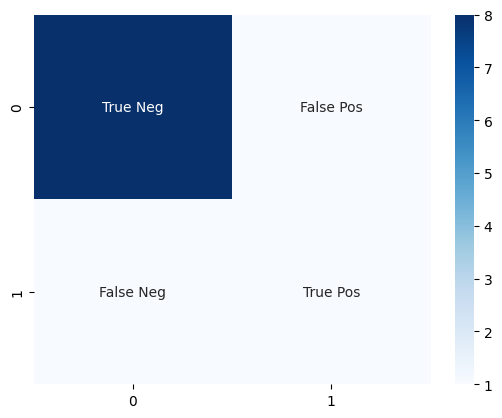

In [ ]:
import seaborn as sns
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

<Axes: >

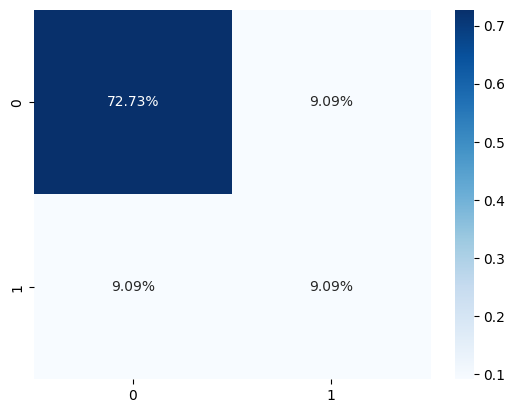

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Model 2 (XGBoost)

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [ ]:
# fit model training data
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# make predictions for test data
predictions_xgb = model_xgb.predict(X_test)
predictions_xgb = [round(value) for value in predictions_xgb]

In [ ]:
accuracy_score(y_test, predictions_xgb)

0.8181818181818182

In [ ]:
f1_score(y_test, predictions_xgb, average='micro')

0.8181818181818182

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions_xgb)
cf_matrix

array([[9, 0],
       [2, 0]], dtype=int64)

<Axes: >

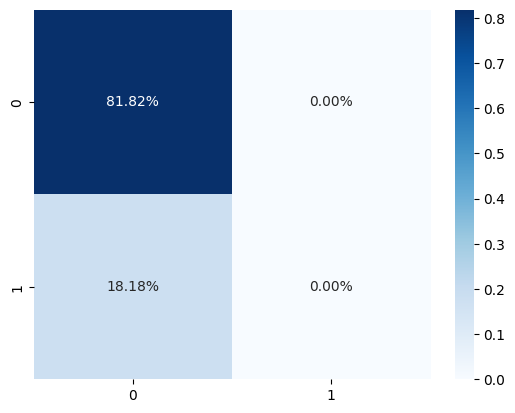

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Model 3 (SVM)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()

In [ ]:
svm_model.fit(X_train,y_train)

SVC()

In [ ]:
predictions_svm = svm_model.predict(X_test)
predictions_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_score(y_test, predictions_svm)

0.8181818181818182

In [ ]:
f1_score(y_test, predictions_svm, average='micro')

0.8181818181818182

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions_svm)
cf_matrix

array([[9, 0],
       [2, 0]], dtype=int64)

Model 4 (Random Forest Classifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier() #using Random Forest Classifier

In [ ]:
RF_model.fit(X_train, y_train) 

RandomForestClassifier()

In [ ]:
predictions_rf = RF_model.predict(X_test)
predictions_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_score(y_test, predictions_rf)

0.8181818181818182

In [ ]:
f1_score(y_test, predictions_rf, average='micro')

0.8181818181818182

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions_rf)
cf_matrix

array([[9, 0],
       [2, 0]], dtype=int64)

Model 5 (CNN)

In [ ]:
model2 = Sequential()
model2.add(Dense(3, activation='relu', input_dim=3))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model2.fit(X_train, np.array(y_train), validation_split=.1, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.7612 - binary_accuracy: 0.1579 - val_loss: 0.7423 - val_binary_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.7581 - binary_accuracy: 0.1579 - val_loss: 0.7391 - val_binary_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.7549 - binary_accuracy: 0.1579 - val_loss: 0.7359 - val_binary_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7518 - binary_accuracy: 0.1579 - val_loss: 0.7327 - val_binary_accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7487 - binary_accuracy: 0.1579 - val_loss: 0.7295 - val_binary_accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.7456 - binary_accuracy: 0.1579 - val_loss: 0.7264 - val_binary_accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================

1/1 [==============================] - 0s 50ms/step - loss: 0.7219 - binary_accuracy: 0.1579 - val_loss: 0.7022 - val_binary_accuracy: 0.0000e+00
Epoch 15/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.7191 - binary_accuracy: 0.1579 - val_loss: 0.6993 - val_binary_accuracy: 0.0000e+00
Epoch 16/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.7162 - binary_accuracy: 0.1579 - val_loss: 0.6964 - val_binary_accuracy: 0.0000e+00
Epoch 17/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.7134 - binary_accuracy: 0.3684 - val_loss: 0.6935 - val_binary_accuracy: 0.6667
Epoch 18/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.7106 - binary_accuracy: 0.6316 - val_loss: 0.6907 - val_binary_accuracy: 0.6667
Epoch 19/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.7078 - binary_accuracy: 0.6316 - val_loss: 0.6878 - val_binary_accuracy: 1.0000
Epoch 20/1000
1/1 [==============================] - 0s 66ms/step 

In [ ]:
predictions_model2 = model2.predict([np.array(X_test)])

1/1 [==============================] - 0s 123ms/step


In [ ]:
for i in predictions_model2:
    i[0] = i[0]*10

for i in predictions_model2:
    if i[0]>0.5:
        i[0]=1
    else:
        i[0]=0

In [ ]:
accuracy_score(y_test, predictions_model2)

0.18181818181818182

In [ ]:
f1_score(y_test, predictions_rf, average='micro')

0.8181818181818182

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions_rf)
cf_matrix

array([[9, 0],
       [2, 0]], dtype=int64)

In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\dhani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 445.2 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.1 MB 1.7 MB/s eta 0:00:02
   ---------- ----------------------------- 0.6/2.1 MB 3.5 MB/s eta 0:00:01
   ---------------- ----------------------- 0.9/2.1 MB 4.5 MB/s eta 0:00:01
   ---------------------- ----------------- 1.2/2.1 MB 5.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.4/2.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 5.8 M

In [ ]:
pip install graphviz


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\dhani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from tensorflow.keras.utils import plot_model
import pydot
import graphviz

In [ ]:
import pydot
import graphviz

In [ ]:
plot_model(model1,to_file="Model1_plot",show_shapes=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
